<div style="line-height:0.45">
<h1 style="color:#0AE42F  ">  K-means method 2 </h1>
</div>
<div style="line-height:0.4">
<h4> 5 solutions for K-Means with sklearn on the mushroom dataset.
</h4>
<div style="margin-top: 4px;">
<span style="display: inline-block;">
    <h3 style="color: lightblue; display: inline;">Keywords:</h3> DBSCAN + PCA + AgglomerativeClustering + Davies-Bouldin Index + Calinski Harabasz Score
</span>
</div>

In [54]:
import sys
import seaborn
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict

from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics.cluster import adjusted_rand_score

In [3]:
from sklearn import __version__
print(__version__)

1.2.0


<h3 style="color:#0AE42F  ">  Simple Classification with Knn </h3>

In [4]:
mush = pd.read_csv('./data_to_use/mushrooms.csv')
mush.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   type                      8124 non-null   object
 1   cap_shape                 8124 non-null   object
 2   cap_surface               8124 non-null   object
 3   cap_color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill_attachment           8124 non-null   object
 7   gill_spacing              8124 non-null   object
 8   gill_size                 8124 non-null   object
 9   gill_color                8124 non-null   object
 10  stalk_shape               8124 non-null   object
 11  stalk_root                8124 non-null   object
 12  stalk_surface_above_ring  8124 non-null   object
 13  stalk_surface_below_ring  8124 non-null   object
 14  stalk_color_above_ring  

In [6]:
mush.dtypes

type                        object
cap_shape                   object
cap_surface                 object
cap_color                   object
bruises                     object
odor                        object
gill_attachment             object
gill_spacing                object
gill_size                   object
gill_color                  object
stalk_shape                 object
stalk_root                  object
stalk_surface_above_ring    object
stalk_surface_below_ring    object
stalk_color_above_ring      object
stalk_color_below_ring      object
veil_type                   object
veil_color                  object
ring_number                 object
ring_type                   object
spore_print_color           object
population                  object
habitat                     object
dtype: object

In [7]:
# Check null data
mush.isnull().sum()

type                        0
cap_shape                   0
cap_surface                 0
cap_color                   0
bruises                     0
odor                        0
gill_attachment             0
gill_spacing                0
gill_size                   0
gill_color                  0
stalk_shape                 0
stalk_root                  0
stalk_surface_above_ring    0
stalk_surface_below_ring    0
stalk_color_above_ring      0
stalk_color_below_ring      0
veil_type                   0
veil_color                  0
ring_number                 0
ring_type                   0
spore_print_color           0
population                  0
habitat                     0
dtype: int64

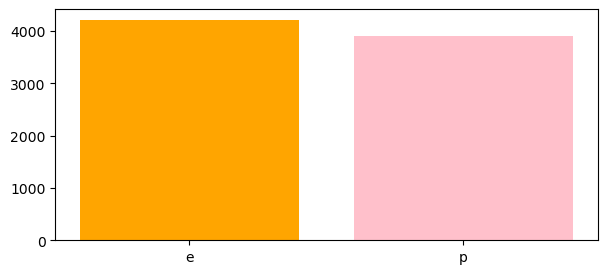

In [8]:
# Plotting class in bars
plt.figure(figsize=(7, 3))
plt.bar(mush['type'].value_counts().index, mush['type'].value_counts().values,color=['orange', 'pink'])
plt.show()

In [9]:
""" Data manipulation """
df = mush.copy()        #better use a copy
Lb = LabelEncoder()     #since data has ordinal attributes

## Encode all the attributes (including the y labels)
for features in df.columns:
    df[features] = Lb.fit_transform(df[features])
df.head()

,type,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


<Axes: xlabel='type'>

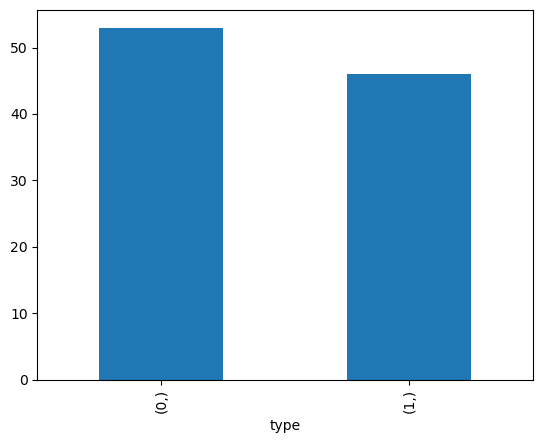

In [10]:
# Plot with pandas
df[-100:-1][['type']].value_counts().plot(kind='bar')

In [11]:
""" Training """
X = df.drop(columns=['type'],axis=1)[:-100]    #training vars
Y = df['type'][:-100]                          #training classes
x = df.drop(columns=['type'], axis=1)[-100:]   #100 samples
y = df['type'][-100:] 

### => 2-Fold cross-validation

X_before was: [[5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]
 [5 3 9 1 0 1 0 0 5 0 2 2 2 7 7 0 2 1 4 2 2 1]
 [0 2 8 1 0 1 0 0 2 0 2 2 2 7 7 0 2 1 4 2 2 3]
 [0 3 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 3 3]
 [5 3 8 1 6 1 0 1 7 0 3 2 2 7 7 0 2 1 4 2 4 1]
 [0 2 9 1 0 1 0 0 2 0 2 2 2 7 7 0 2 1 4 2 3 3]]
X final is : [[5 2 4 1 6 1 0 1 4 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 9 1 0 1 0 0 4 0 2 2 2 7 7 0 2 1 4 3 2 1]
 [0 2 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 2 3]
 [5 3 8 1 6 1 0 1 5 0 3 2 2 7 7 0 2 1 4 2 3 5]
 [5 2 3 0 5 1 1 0 4 1 3 2 2 7 7 0 2 1 0 3 0 1]
 [5 3 9 1 0 1 0 0 5 0 2 2 2 7 7 0 2 1 4 2 2 1]
 [0 2 8 1 0 1 0 0 2 0 2 2 2 7 7 0 2 1 4 2 2 3]
 [0 3 8 1 3 1 0 0 5 0 2 2 2 7 7 0 2 1 4 3 3 3]
 [5 3 8 1 6 1 0 1 7 0 3 2 2 7 7 0 2 1 4 2 4 1]
 [0 2 9 1 0 1 0 0 2 0 2 2 2 7 7 0 2 1 4 2 3 3]]


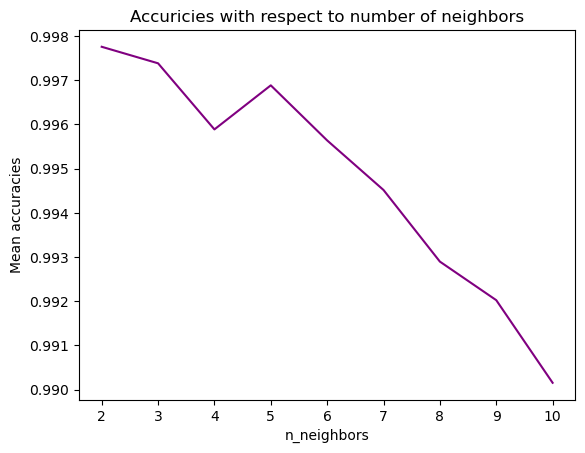

In [15]:
""" 
N.B.1
Common issue in cross-validation: 
c_contiguous attribute is missing from a Flags object. 
It is a requirement for cross_val_score method: The c_contiguous attribute is used to check if an array is stored in C-contiguous order (row-major order), 
Avoid error converting the X array to C-contiguous order using ascontiguousarray() [X = np array]

N.B.2
Manually suppress the warning to avoid:
"FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead."
Check `isinstance(dtype, pd.SparseDtype)`
"""
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

kfold = KFold(n_splits=2, random_state=42, shuffle=True)
train_scores = []

### Convert X to C-contiguous order
print(f"X_before was: {X[:10]}")
X = np.ascontiguousarray(X)
print(f"X final is : {X[:10]}")

### Create the classifiers and score them
for i in range(2, 11):
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_result = cross_val_score(knn, X, Y, cv=kfold, scoring="accuracy")
    train_scores.append(cv_result.mean())
knn_models_performances = pd.DataFrame({'Mean_training_scores':train_scores},index=range(2,11)) 

###### Display training scores
plt.plot(knn_models_performances.Mean_training_scores, color='purple')
plt.ylabel('Mean accuracies')
plt.xlabel('n_neighbors')
plt.title('Accuricies with respect to number of neighbors')
plt.show()


In [16]:
training_score = []
testing_score = []
# Accuracy has the best result on 2 neighbors
knn = KNeighborsClassifier(n_neighbors=2)

######## Train the KNN on 2 neighbors
for train_index, test_index in kfold.split(X):
    print(train_index)
    X_train, X_test = X[train_index], X[test_index]     #iloc does not exist in numpy !
    Y_train, Y_test = Y[train_index], Y[test_index]
    knn.fit(X_train,Y_train)
    training_score.append(knn.score(X,Y))
    train_predictions = knn.predict(X_test)
    testing_score.append(accuracy_score(Y_test, train_predictions))

print()
print("training_score is: {training_score}".format(training_score=training_score))
print("testing_score is: {testing_score}".format(testing_score=testing_score))    

[   1    2    3 ... 8015 8020 8022]
[   0    8   12 ... 8019 8021 8023]

training_score is: [0.9982552342971087, 0.9992522432701895]
testing_score is: [0.9970089730807578, 0.9985044865403788]


x before was:       cap_shape  cap_surface  cap_color  bruises  odor  gill_attachment  \
8024          3            3          4        0     2                1   
8025          5            2          4        0     5                0   
8026          2            2          4        0     5                0   
8027          3            3          4        0     2                1   
8028          3            2          4        0     2                1   
8029          5            0          3        0     5                1   
8030          3            2          8        0     5                1   
8031          3            3          2        0     2                1   
8032          5            2          4        0     2                1   
8033          3            3          4        0     2                1   

      gill_spacing  gill_size  gill_color  stalk_shape  ...  \
8024             0          1           0            1  ...   
8025             0          0     

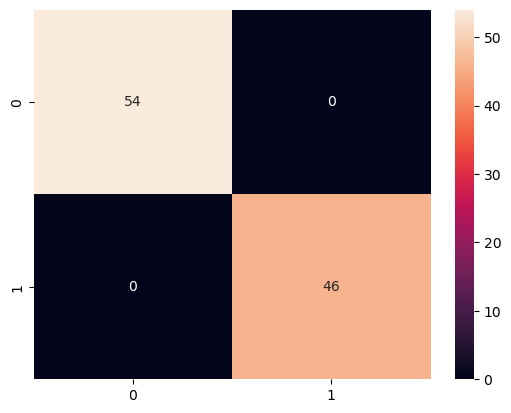

In [17]:
""" Validation """
### Convert X to C-contiguous order
print(f"x before was: {x[:10]}")
x = np.ascontiguousarray(x)
print(f"x final is : {x[:10]}")
print()

# Predict 
val_predictions = knn.predict(x)
# Get Variances and show the confusion_matrix  
cm = confusion_matrix(y, val_predictions)
seaborn.heatmap(cm, annot=True)
# Metrics
print(classification_report(y, val_predictions))

<h2 style="color:#0AE42F  "> 1) <u> K-means solution </u></h2>

In [18]:
""" No need to split the data into folds, use training attributes 
    Params: 
        * k-means++ : selects initial cluster centroids using sampling based on an empirical probability distribution 
            of the points’ contribution to the overall inertia. 
            It speeds up convergence. The implemented algorithm  is “greedy k-means++”. 
            It differs from the vanilla k-means++ by making several trials at each sampling step and choosing the best centroid among them.
            The other options is random : 
                                choose n_clusters observations (rows) at random from data for the initial centroids.
        * n_jobs option has been deprecated after sklearn 0.24.2.. Now all cores are used by default. 
"""
kmeans = KMeans(2, init='k-means++', n_init=100) # add "n_jobs = -1" to use all cpus, if more than one is available

# Train ...no Y labels
kmeans.fit(X) 
# Calc the confusion matrix with trained labels + training classes 
cm_1 = confusion_matrix(Y, kmeans.labels_)

print(cm_1)

[[3967  187]
 [2170 1700]]


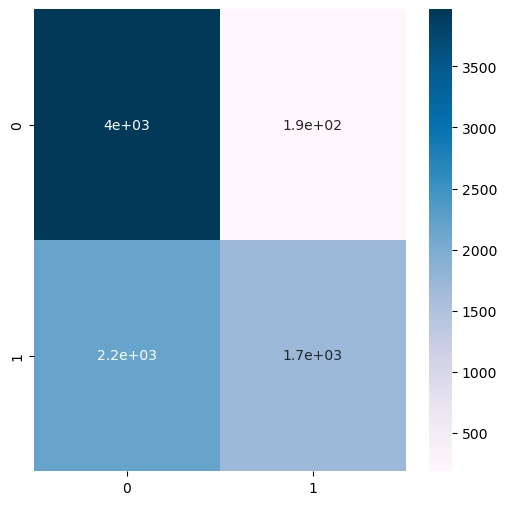

In [20]:
## Show heatmap
plt.figure(figsize=(6,6))
seaborn.heatmap(cm_1,annot=True, cmap='PuBu')
plt.show()

In [21]:
# Classification report of training
print(classification_report(Y, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.65      0.95      0.77      4154
           1       0.90      0.44      0.59      3870

    accuracy                           0.71      8024
   macro avg       0.77      0.70      0.68      8024
weighted avg       0.77      0.71      0.68      8024



[[49  5]
 [ 2 44]]


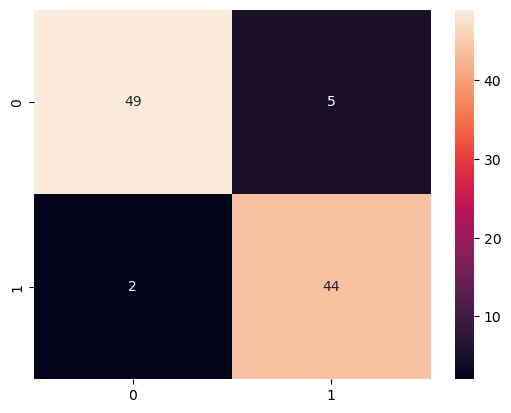

In [24]:
# Validation part
val_preds = kmeans.predict(x)
cm_2 = confusion_matrix(y, val_preds)
print(cm_2)

seaborn.heatmap(cm_2, annot=True)
plt.show()

In [25]:
# Validation results
print(classification_report(y, val_preds))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93        54
           1       0.90      0.96      0.93        46

    accuracy                           0.93       100
   macro avg       0.93      0.93      0.93       100
weighted avg       0.93      0.93      0.93       100



<div style="line-height:0.62">
<h3 style="color:#0AE42F  "> => Conclusions </h3>
The K-means algorithm is not performing well on this dataset.   

Possible Adjustments:
</div>

+ Feature engineering ...Means create new features combining existing ones to better capture the underlying structure of the data.   
=> can be useful but not what I want now   
+ Scaling  => K-means is sensitive to the scale of the input features. If some features have much larger ranges than others, <br> 
they can dominate the clustering process.   
=> Is want I want! See the results.
+ Hyperparameters tuning   
+ Change clustering algorithm   
+ Perform dimensionality reduction    

<h2 style="color:#0AE42F  "> 2) <u> Scaling solution </u></h2>

[[ 187 3967]
 [1700 2170]]


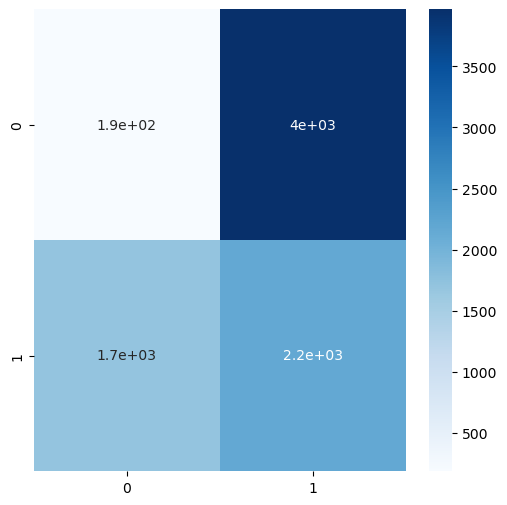

In [26]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(2, init='k-means++', n_init=100)
# Train
kmeans.fit(X) 
cm_1 = confusion_matrix(Y, kmeans.labels_)
print(cm_1)
plt.figure(figsize=(6,6))
seaborn.heatmap(cm_1,annot=True, cmap='Blues')
plt.show()

In [27]:
# Classification report of training
print(classification_report(Y, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.10      0.05      0.06      4154
           1       0.35      0.56      0.43      3870

    accuracy                           0.29      8024
   macro avg       0.23      0.30      0.25      8024
weighted avg       0.22      0.29      0.24      8024



[[ 5 49]
 [44  2]]


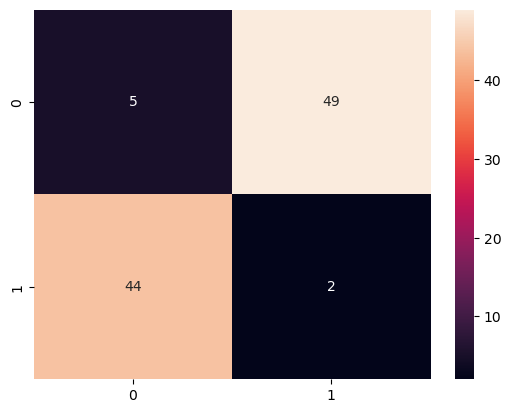

In [30]:
# Validation part
val_preds = kmeans.predict(x)
cm_2 = confusion_matrix(y,val_preds)
print(cm_2)

seaborn.heatmap(cm_2, annot=True)
plt.show()

In [31]:
# Validation results
print(classification_report(y, val_preds))

              precision    recall  f1-score   support

           0       0.10      0.09      0.10        54
           1       0.04      0.04      0.04        46

    accuracy                           0.07       100
   macro avg       0.07      0.07      0.07       100
weighted avg       0.07      0.07      0.07       100



### => Tuning hyperparameters

In [32]:
# Different values of k
for k in range(2, 10):
    kmeans = KMeans(k, init='k-means++', n_init=100)
    kmeans.fit(X_scaled)
    print(f"k={k}, inertia={kmeans.inertia_}")

# try different initialization methods
kmeans = KMeans(2, init='random', n_init=100)
kmeans.fit(X_scaled)
print(f"Inertia with random initialization: {kmeans.inertia_}")

kmeans = KMeans(2, init='k-means++', n_init=100)
kmeans.fit(X_scaled)
print(f"Inertia with k-means++ initialization: {kmeans.inertia_}")

k=2, inertia=142032.41964564365
k=3, inertia=124073.06383934783
k=4, inertia=107878.78695865477
k=5, inertia=92420.80225531671
k=6, inertia=80353.82293874021
k=7, inertia=69470.68626651281
k=8, inertia=65680.31208312209
k=9, inertia=62347.285434789745
Inertia with random initialization: 142032.41964564368
Inertia with k-means++ initialization: 142032.41964564365


<h2 style="color:#0AE42F  "> 3) <u> Change clustering technique solution </u></h2>

In [34]:
""" Hierarchical clustering """
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical.fit(X_scaled);

[[4154    0]
 [2186 1684]]


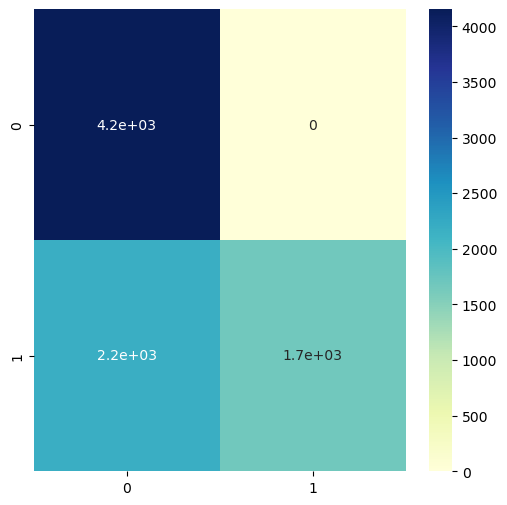

In [35]:
# Confusion matrix
cm = confusion_matrix(Y, hierarchical.labels_)
print(cm)
## Plot
plt.figure(figsize=(6,6))
seaborn.heatmap(cm, annot=True, cmap='YlGnBu')
plt.show()

In [36]:
# Classification report
print(classification_report(Y, hierarchical.labels_))

              precision    recall  f1-score   support

           0       0.66      1.00      0.79      4154
           1       1.00      0.44      0.61      3870

    accuracy                           0.73      8024
   macro avg       0.83      0.72      0.70      8024
weighted avg       0.82      0.73      0.70      8024



<div style="line-height:0.65">
<h3> DBSCAN </h3>
</div>
A density-based clustering algorithm that groups together points that are close to each other in high-density regions,    <br>
while marking points in low-density regions as noise.

    Parameters
    ----------
    eps : float, default=0.5
        The maximum distance between two samples for one to be considered
        as in the neighborhood of the other. This is not a maximum bound
        on the distances of points within a cluster. This is the most
        important DBSCAN parameter to choose appropriately for your data set
        and distance function.

    min_samples : int, default=5
        The number of samples (or total weight) in a neighborhood for a point
        to be considered as a core point. This includes the point itself.

    metric : str, or callable, default='euclidean'
        The metric to use when calculating distance between instances in a
        feature array. If metric is a string or callable, it must be one of
        the options allowed by :func:`sklearn.metrics.pairwise_distances` for
        its metric parameter.
        If metric is "precomputed", X is assumed to be a distance matrix and
        must be square. X may be a :term:`sparse graph`, in which
        case only "nonzero" elements may be considered neighbors for DBSCAN.

        .. versionadded:: 0.17
           metric *precomputed* to accept precomputed sparse matrix.

    metric_params : dict, default=None
        Additional keyword arguments for the metric function.

        .. versionadded:: 0.19

    algorithm : {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'
        The algorithm to be used by the NearestNeighbors module
        to compute pointwise distances and find nearest neighbors.
        See NearestNeighbors module documentation for details.

    leaf_size : int, default=30
        Leaf size passed to BallTree or cKDTree. This can affect the speed
        of the construction and query, as well as the memory required
        to store the tree. The optimal value depends
        on the nature of the problem.

    p : float, default=None
        The power of the Minkowski metric to be used to calculate distance
        between points. If None, then ``p=2`` (equivalent to the Euclidean
        distance).

    n_jobs : int, default=None
        The number of parallel jobs to run.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

In [37]:
""" DBSCAN clustering (SLOW). """
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_scaled); # don't show output

<div style="line-height:0.45">
<h1 style="color:#0AE42F  ">  4) <u> Metrics </u> </h1>
</div>

In [38]:
# Confusion matrix
cm = confusion_matrix(Y, dbscan.labels_)
#print(cm) #too long!

In [42]:
%%script echo Skipping, just left as a reminder
""" DBSCAN does not assign all points to a cluster, it is not appropriate to use a confusion matrix to evaluate its performance. 
The confusion matrix assumes that each data point belongs to exactly one class, which is not the case for DBSCAN. 
To evaluate the quality of the DBSCAN clustering it is necessary to expoit other metrics, such as the silhouette score or the DB index.
"""
plt.figure(figsize=(6,6))
seaborn.heatmap(cm, annot=True, cmap='Reds')

Skipping, just left as a reminder


<h3 style="color:#0AE42F "> Recap: Davies-Bouldin Index </h3>
<div style="margin-top: -10px;">

The DBI is a metric for evaluating how well a clustering is well-defined. <br>
Computes the average similarity measure of each cluster with its most similar cluster. Lower values indicate better clustering solutions.
</div>

$$ DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{\sigma_i + \sigma_j}{d(c_i, c_j)} \right) $$

Where:
- \( k \) is the number of clusters
- \( \sigma_i \) is the average distance of all points in cluster \( i \) to the centroid \( c_i \) of cluster \( i \)
- \( \sigma_j \) is the same for cluster \( j \)
- \( d(c_i, c_j) \) is the distance between centroids \( c_i \) and \( c_j \)


In [43]:
""" Silhouette score metric. (see 'unsup_01_kmeans_1' notebook)
N.B.
Removed part:
# # Calc Silhouette score
# score = silhouette_score(X, dbscan.labels_)
# # Compute DB index
# score = davies_bouldin_score(X, dbscan.labels_)

To avoid the "ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)"
...check if DBSCAN has assigned more than one cluster before computing the scores.
"""
## Fit DBSCAN
dbscan = DBSCAN(eps=0.1, min_samples=25)
dbscan.fit(X)

# Check if DBSCAN assigned more than one cluster (excluding noise)
n_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
n_noise = list(dbscan.labels_).count(-1)

# Check if DBSCAN assigned more than one cluster
if len(set(dbscan.labels_)) > 1:
    # Compute Silhouette score
    silhouette = silhouette_score(X, dbscan.labels_)
    # Compute DB index
    db_index = davies_bouldin_score(X, dbscan.labels_)
    print("Silhouette score:", silhouette)
    print("DB index:", db_index)
else:
    print("DBSCAN assigned only one cluster. Cannot compute Silhouette score or DB index.")
    print(f"DBSCAN found {n_clusters} clusters and {n_noise} noise points.")

DBSCAN assigned only one cluster. Cannot compute Silhouette score or DB index.


In [46]:
""" Use grid search to find better eps and min_samples parameters. """
eps_values = [0.1, 0.2, 0.3, 0.5, 0.8, 1]
min_samples_values = [5, 10, 15, 20, 25]

best_silhouette_score = -1
best_db_index = float('inf')
best_eps = None
best_min_samples = None

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(X)

        core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
        core_samples_mask[dbscan.core_sample_indices_] = True
        labels = dbscan.labels_

        # Get the number of clusters in labels, ignoring noise if present.
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
        
        if n_clusters_ > 1:
            silhouette = silhouette_score(X, labels)
            db_index = davies_bouldin_score(X, labels)

            #### Record the best parameters based on silhouette score
            if silhouette > best_silhouette_score:
                best_silhouette_score = silhouette
                best_eps = eps
                best_min_samples = min_samples

            #### Record the best parameters based on DB index
            if db_index < best_db_index:
                best_db_index = db_index
                best_eps = eps
                best_min_samples = min_samples

        print(f'EPS: {eps}, Min Samples: {min_samples}, Clusters: {n_clusters_}, Silhouette: {silhouette if n_clusters_ > 1 else "N/A"}, 
            DB Index: {db_index if n_clusters_ > 1 else "N/A"}')

print(f'Best Silhouette Score: {best_silhouette_score} with EPS: {best_eps} and Min Samples: {best_min_samples}')
print(f'Best DB Index: {best_db_index} with EPS: {best_eps} and Min Samples: {best_min_samples}')

EPS: 0.1, Min Samples: 5, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.1, Min Samples: 10, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.1, Min Samples: 15, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.1, Min Samples: 20, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.1, Min Samples: 25, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.2, Min Samples: 5, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.2, Min Samples: 10, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.2, Min Samples: 15, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.2, Min Samples: 20, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.2, Min Samples: 25, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.3, Min Samples: 5, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.3, Min Samples: 10, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.3, Min Samples: 15, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.3, Min Samples: 20, Clusters: 0, Silhouette: N/A, DB Index: N/A
EPS: 0.3,

If eps param is too large or min_samples is too low,    
DBSCAN may assign too many points to the same cluster, resulting in a clustering that is too coarse or granular.



If DBSCAN assigned only one cluster, it means that all points are considered as noise or belong to the same cluster     
based on the chosen parameters eps and min_samples. This can happen if the data is too sparse or noisy,   
or if the parameter values are not appropriate for the data.
--> increase min_samples or decrease esp!



<h3 style="color:#0AE42F "> Recap:  Calinski-Harabasz Score </h3>
<div style="margin-top: -10px;">
The Calinski-Harabasz score, also known as the Variance Ratio Criterion, is a metric used to evaluate the quality of a clustering. It is a function of the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters, where dispersion is defined as the sum of distances squared. <br>
The score is defined as follows: 

$$ CH(k) = \frac{SSB / (k - 1)}{SSW / (n - k)} $$

Where:
- <b> CH(k) </b>  is the Calinski-Harabasz score for k clusters,
- <b> SSB </b>   is the sum of squares between clusters,
- <b> SSW </b>   is the sum of squares within clusters,
- <b> n </b>  is the number of points in the dataset,
- <b> k </b>  is the number of clusters.
</div>

In [49]:
""" Try to calculate the 'Calinski-Harabasz index' on another dataset. """
# Load a dataset
X, _ = datasets.make_blobs(n_samples=150, centers=3, cluster_std=0.60, random_state=0)

## Perform clustering with KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
labels = kmeans.labels_

# Calculate the Calinski-Harabasz index using the labels from KMeans
score = calinski_harabasz_score(X, labels)
print('Calinski-Harabasz index:', score)


Calinski-Harabasz index: 453.0552420706031


<h3 style="color:#0AE42F "> Recap: Adjusted Rand Index </h3>
<div style="margin-top: -10px;">
ARI measures the similarity between two clusters, considering all pairs of samples. 
It counts pairs that are assigned in the same or different clusters in the predicted and true clusters. <br>
The ARI score is then adjusted for chance which makes it suitable for comparing clustering algorithms with a different number of clusters.
<br>
</div>

$$
\text{ARI} = \frac{\text{Index} - \text{Expected Index}}{\text{Max Index} - \text{Expected Index}}
$$

where:

$$
\text{Index} = \sum_{ij} \binom{n_{ij}}{2}
$$

$$
\text{Expected Index} = \frac{\sum_i \binom{a_i}{2} \sum_j \binom{b_j}{2}}{\binom{n}{2}}
$$

$$
\text{Max Index} = \frac{1}{2} \left( \sum_i \binom{a_i}{2} + \sum_j \binom{b_j}{2} \right)
$$

$$
a_i = \sum_j n_{ij}, \quad b_j = \sum_i n_{ij}, \quad \text{and} \quad \binom{n}{2} = \frac{n(n-1)}{2}
$$

- <b> n_{ij} </b>  is the number of objects that are both in cluster \( i \) and in cluster \( j \).
- <b> a_i </b>  is the number of objects in cluster \( i \).
- <b> b_j </b>  is the number of objects in cluster \( j \).
- <b> n </b> is the total number of objects.


In [56]:
# Generate a synthetic dataset
X, y_true = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

## Apply KMeans clustering 
kmeans = KMeans(n_clusters=3, random_state=42)
y_pred = kmeans.fit_predict(X)

# Calculate Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, y_pred)
print(f"Adjusted Rand Index: {ari:.3f}")

Adjusted Rand Index: 0.329


In [57]:
""" Check how ARI works with a random (not clustered) labeling.
When the ARI for random labeling is very close to zero it means that the random labels are almost perfectly random, 
and any small fluctuations around zero are due to chance. """

random_labels = np.random.randint(0, 2, size=y_true.shape)
ari_random = adjusted_rand_score(y_true, random_labels)
print(f"ARI for random labeling: {ari_random:.3f}")

ARI for random labeling: 0.001


<div style="line-height:0.45">
<h1 style="color:#0AE42F  ">  5) <u> PCA solution </u> </h1>
</div>
Feature extraction

<h3 style="color:#0AE42F "> Recap:  PCA </h3>
<div style="margin-top: -10px;">
Principal Component Analysis, is a dimensionality reduction technique often used to simplify data, improve algorithms’ performance, and remove noise. <br>
It transforms a large set of variables into a smaller one that still contains most of the information in the large set by identifying the components that capture the greatest variance in the data. <br> 
</div>

In [50]:
## Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[-0.56805172, -1.01814435],
       [-2.27275249,  0.23691278],
       [-1.84584054, -0.30955666],
       ...,
       [ 3.51264635, -0.75549856],
       [ 3.98946466, -0.3610526 ],
       [ 3.80284885, -0.96308617]])

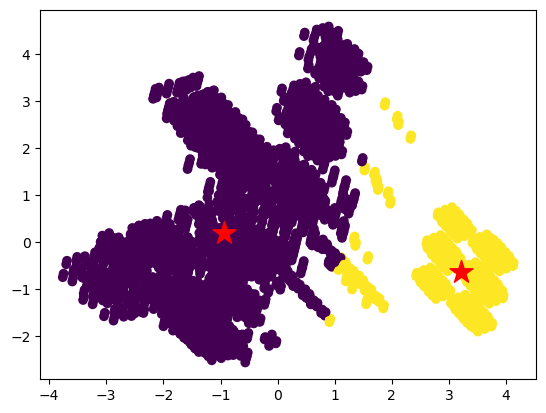

In [51]:
""" Perform KMeans on transformed data 
Pass n_init=10 to KMeans to suppress the FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. """
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(X_pca)

# Plot results
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='*', s=300, c='r')
plt.show()

[[4034  120]
 [2166 1704]]


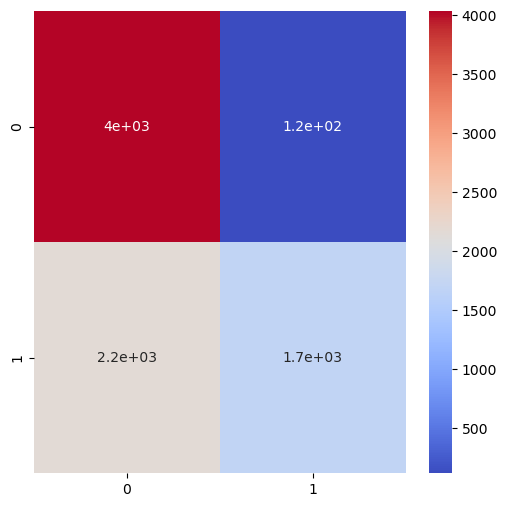

In [52]:
# Compute confusion matrix
cm = confusion_matrix(Y, kmeans.labels_)
print(cm)

# Display confusion matrix
plt.figure(figsize=(6,6))
seaborn.heatmap(cm, annot=True, cmap='coolwarm')
plt.show()

In [53]:
# Compute classification report
print(classification_report(Y, kmeans.labels_))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78      4154
           1       0.93      0.44      0.60      3870

    accuracy                           0.72      8024
   macro avg       0.79      0.71      0.69      8024
weighted avg       0.79      0.72      0.69      8024

